# Testing for Significance

In [1]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
import saferdetections as detect

## Separating Detections by ion & Vir Rad Criteria

In [2]:
data= pd.read_csv('../galfit_spectral_refined_table_for_kirill_w_bval_3.csv')
detections_h1_05r= detect.sort_detections(data, ion= 'H_I', vir_rad= 0.5)
detections_h1_1r= detect.sort_detections(data, ion= 'H_I', vir_rad= 1)
detections_h1_2r= detect.sort_detections(data, ion= 'H_I', vir_rad= 2)
detections_o6_05r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 0.5)
detections_o6_1r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 1)
detections_o6_2r= detect.sort_detections(data, ion= 'O_VI', vir_rad= 2)

The max rho_rvir value in this data set is 0.4712706040314508
The total number of detections is 8
The max rho_rvir value in this data set is 0.948264985334893
The total number of detections is 20
The max rho_rvir value in this data set is 1.9802986082934129
The total number of detections is 51
The max rho_rvir value in this data set is 0.4604307416991528
The total number of detections is 12
The max rho_rvir value in this data set is 0.948264985334893
The total number of detections is 21
The max rho_rvir value in this data set is 1.9802986082934129
The total number of detections is 33


In [3]:
data.columns

Index(['gal_num', 'id', 'QSO', 'mstars', 'SFR', 'sSFR', 'galaxy_RA',
       'galaxy_DEC', 'redshift', 'xcoord', 'xcoord_error', 'ycoord',
       'ycoord_error', 'int_mag', 'int_mag_error', 'half_light_rad',
       'half_light_rad_error', 'sersic_index', 'sersic_index_error',
       'axis_ratio', 'axis_ratio_error', 'position_angle',
       'position_angle_error', 'reduced_chi_squared', 'azimuthal_angle',
       'inclination_angle', 'is_good_fit', 'shows_internal_struct',
       'overlaps_w_object', 'is_big_galaxy', 'edited', 'double_model', 'zQSO',
       'RA_QSO', 'DEC_QSO', 'survey', 'mstars.1', 'logmhalo', 'rho_comoving',
       'rho_impact', 'rvir', 'rho_rvir', 'gal_type', 'metallicity',
       'panstarrs_i', 'panstarrs_i_err', 'H_I_log10_N_det_thresh',
       'O_VI_log10_N_det_thresh', 'H_I_total_log10_N', 'H_I_log10_N_comps',
       'H_I_log10_N_err_comps', 'H_I_b_comps', 'H_I_b_err_comps',
       'H_I_vcen_comps', 'O_VI_total_log10_N', 'O_VI_log10_N_comps',
       'O_VI_log10_N_

# Collecting data from each statistical test

## O VI Column Density: 0.5,1, and 2 virial radii

In [4]:
i_vals= np.linspace(0,20,21)
# MannWhitneyU
p_values_mwu_o6_05r= []
p_values_mwu_o6_1r= []
p_values_mwu_o6_2r= []
# Students T
p_values_t_o6_05r= []
p_values_t_o6_1r= []
p_values_t_o6_2r= []
# KS 2Samp
res_ks2_o6_05r=[]
res_ks2_o6_1r= []
res_ks2_o6_2r= []
p_values_ks2_o6_05r=[]
p_values_ks2_o6_1r=[]
p_values_ks2_o6_2r=[]

# Virial Rad=0.5
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_05r[detections_o6_05r['azimuthal_angle']<(45-i)]['N_O_VI_components']
    disk = detections_o6_05r[detections_o6_05r['azimuthal_angle']>(45+i)]['N_O_VI_components']
    # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_05r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_05r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_05r.append(res_ks)

# Virial Rad= 1
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_1r[detections_o6_1r['azimuthal_angle']<(45-i)]['N_O_VI_components']
    disk = detections_o6_1r[detections_o6_1r['azimuthal_angle']>(45+i)]['N_O_VI_components']
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_1r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_1r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_1r.append(res_ks)
    
# Virial Rad=2
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_o6_2r[detections_o6_2r['azimuthal_angle']<(45-i)]['N_O_VI_components']
    disk = detections_o6_2r[detections_o6_2r['azimuthal_angle']>(45+i)]['N_O_VI_components']
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_o6_2r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_o6_2r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_o6_2r.append(res_ks)
    
# Creating a list of pvalues for the KS 2 Sample Test for Plotting
for value in res_ks2_o6_05r:
    stat, pval= value
    p_values_ks2_o6_05r.append(pval)
for value in res_ks2_o6_1r:
    stat, pval= value
    p_values_ks2_o6_1r.append(pval)
for value in res_ks2_o6_2r:
    stat, pval= value
    p_values_ks2_o6_2r.append(pval)

## H I Column Density: 0.5,1, and 2 virial radii

In [5]:
# MannWhitneyU
p_values_mwu_h1_05r= []
p_values_mwu_h1_1r= []
p_values_mwu_h1_2r= []
# Students T
p_values_t_h1_05r= []
p_values_t_h1_1r= []
p_values_t_h1_2r= []
# KS 2Samp
res_ks2_h1_05r=[]
res_ks2_h1_1r= []
res_ks2_h1_2r= []
p_values_ks2_h1_05r=[]
p_values_ks2_h1_1r=[]
p_values_ks2_h1_2r=[]

# Virial Rad=0.5
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_05r[detections_h1_05r['azimuthal_angle']<(45-i)]['N_H_I_components']
    disk = detections_h1_05r[detections_h1_05r['azimuthal_angle']>(45+i)]['N_H_I_components']
    # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_05r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_05r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_05r.append(res_ks)

# Virial Rad= 1
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_1r[detections_h1_1r['azimuthal_angle']<(45-i)]['N_H_I_components']
    disk = detections_h1_1r[detections_h1_1r['azimuthal_angle']>(45+i)]['N_H_I_components']
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_1r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_1r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_1r.append(res_ks)
    
# Virial Rad=2
for i in i_vals:
    # adjusting by 1 degree each time
    pole = detections_h1_2r[detections_h1_2r['azimuthal_angle']<(45-i)]['N_H_I_components']
    disk = detections_h1_2r[detections_h1_2r['azimuthal_angle']>(45+i)]['N_H_I_components']
   # find p values for mannwhitneyu test
    res_mwu = mannwhitneyu(pole, disk).pvalue
    p_values_mwu_h1_2r.append(res_mwu)
    # The Students T test
    res_t = ttest_ind(pole, disk).pvalue
    p_values_t_h1_2r.append(res_t)
    # The KS 2 Sample Test
    res_ks = ks_2samp(pole, disk)
    res_ks2_h1_2r.append(res_ks)
    
# Creating a list of pvalues for the KS 2 Sample Test for Plotting
for value in res_ks2_h1_05r:
    stat, pval= value
    p_values_ks2_h1_05r.append(pval)
for value in res_ks2_h1_1r:
    stat, pval= value
    p_values_ks2_h1_1r.append(pval)
for value in res_ks2_h1_2r:
    stat, pval= value
    p_values_ks2_h1_2r.append(pval)

## Creating Data Frame for resultant P values for each test for first O VI and then H I

In [6]:
data_o6 = {
    'i_vals': i_vals,
    'max_polar': 45-i_vals,
    'min_disk': 45+i_vals,
    'MannW_05r': p_values_mwu_o6_05r,
    'StudT_05r': p_values_t_o6_05r,
    'KS2_05r': p_values_ks2_o6_05r,
    
    'MannW_1r': p_values_mwu_o6_1r,
    'StudT_1r': p_values_t_o6_1r,
    'KS2_1r': p_values_ks2_o6_1r,
    
    'MannW_2r': p_values_mwu_o6_2r,
    'StudT_2r': p_values_t_o6_2r,
    'KS2_2r': p_values_ks2_o6_2r
}

# Create a DataFrame
o6_p_data = pd.DataFrame(data_o6)
o6_p_data

,i_vals,max_polar,min_disk,MannW_05r,StudT_05r,KS2_05r,MannW_1r,StudT_1r,KS2_1r,MannW_2r,StudT_2r,KS2_2r
0,0.0,45.0,45.0,0.046557,0.031184,0.222222,0.071265,0.063695,0.419542,0.020683,0.016015,0.190678
1,1.0,44.0,46.0,0.015747,0.002077,0.016667,0.017214,0.011689,0.060924,0.004135,0.002589,0.041714
2,2.0,43.0,47.0,0.015747,0.002077,0.016667,0.017214,0.011689,0.060924,0.004135,0.002589,0.041714
3,3.0,42.0,48.0,0.015747,0.002077,0.016667,0.022159,0.016855,0.079509,0.002849,0.001569,0.024272
4,4.0,41.0,49.0,0.015747,0.002077,0.016667,0.022159,0.016855,0.079509,0.002849,0.001569,0.024272
5,5.0,40.0,50.0,0.015747,0.002077,0.016667,0.022159,0.016855,0.079509,0.002849,0.001569,0.024272
6,6.0,39.0,51.0,0.041911,0.008735,0.055556,0.047331,0.039629,0.215385,0.005085,0.003196,0.040362
7,7.0,38.0,52.0,0.041911,0.008735,0.055556,0.047331,0.039629,0.215385,0.005085,0.003196,0.040362
8,8.0,37.0,53.0,0.041911,0.008735,0.055556,0.047331,0.039629,0.215385,0.005085,0.003196,0.040362
9,9.0,36.0,54.0,0.041911,0.008735,0.055556,0.047331,0.039629,0.215385,0.005085,0.003196,0.040362


In [7]:
data_h1 = {
    'i_vals': i_vals,
    'max_polar': 45-i_vals,
    'min_disk': 45+i_vals,
    'MannW_05r': p_values_mwu_h1_05r,
    'StudT_05r': p_values_t_h1_05r,
    'KS2_05r': p_values_ks2_h1_05r,
    
    'MannW_1r': p_values_mwu_h1_1r,
    'StudT_1r': p_values_t_h1_1r,
    'KS2_1r': p_values_ks2_h1_1r,
    
    'MannW_2r': p_values_mwu_h1_2r,
    'StudT_2r': p_values_t_h1_2r,
    'KS2_2r': p_values_ks2_h1_2r
}

# Create a DataFrame
h1_p_data = pd.DataFrame(data_h1)
h1_p_data

,i_vals,max_polar,min_disk,MannW_05r,StudT_05r,KS2_05r,MannW_1r,StudT_1r,KS2_1r,MannW_2r,StudT_2r,KS2_2r
0,0.0,45.0,45.0,1.0,0.913174,0.964286,0.056447,0.112325,0.090672,0.652554,0.929044,0.983797
1,1.0,44.0,46.0,1.0,0.745274,0.933333,0.041481,0.074208,0.036096,0.494850,0.918261,0.839640
2,2.0,43.0,47.0,1.0,0.745274,0.933333,0.041481,0.074208,0.036096,0.355301,0.537681,0.756240
3,3.0,42.0,48.0,1.0,0.745274,0.933333,0.041481,0.074208,0.036096,0.355301,0.537681,0.756240
4,4.0,41.0,49.0,1.0,0.745274,0.933333,0.041481,0.074208,0.036096,0.260455,0.426679,0.568235
5,5.0,40.0,50.0,1.0,0.745274,0.933333,0.023794,0.039075,0.014860,0.179514,0.322673,0.371982
6,6.0,39.0,51.0,1.0,0.745274,0.933333,0.023794,0.039075,0.014860,0.179514,0.322673,0.371982
7,7.0,38.0,52.0,1.0,0.745274,0.933333,0.023794,0.039075,0.014860,0.179514,0.322673,0.371982
8,8.0,37.0,53.0,1.0,0.745274,0.933333,0.032770,0.069406,0.024242,0.303448,0.493830,0.560930
9,9.0,36.0,54.0,1.0,0.745274,0.933333,0.032770,0.069406,0.024242,0.204520,0.369784,0.357616


# Creating Plots of Stats Results as a Function of Polar Limit

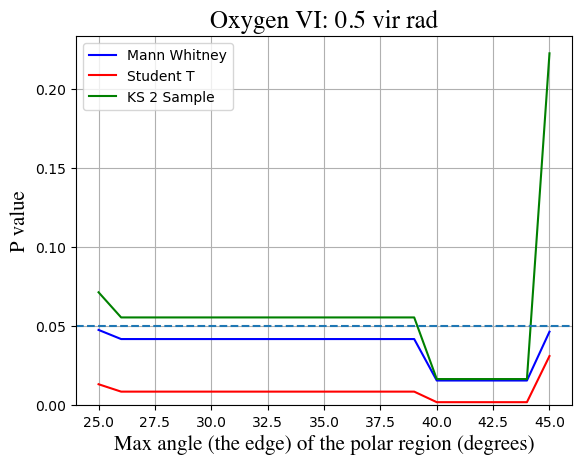

In [8]:
options= ['MannW_05r','StudT_05r','KS2_05r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 0.5 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [9]:
print(r" The average P value for Mann Whitney is {}.".format(o6_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(o6_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(o6_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 0.036177685651557656.
 The average P value for Student T is 0.008441005446524086
 The average P value for KS 2 Sample is 0.05498866213151933


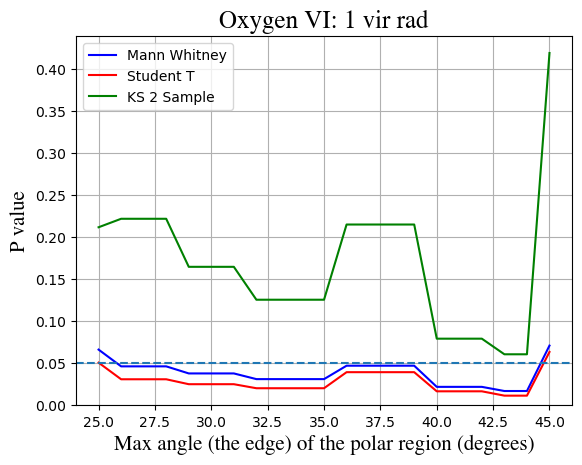

In [10]:
options= ['MannW_1r','StudT_1r','KS2_1r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 1 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [11]:
print(r" The average P value for Mann Whitney is {}.".format(o6_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(o6_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(o6_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 0.03845458011379784.
 The average P value for Student T is 0.02851154188474106
 The average P value for KS 2 Sample is 0.16756400756843043


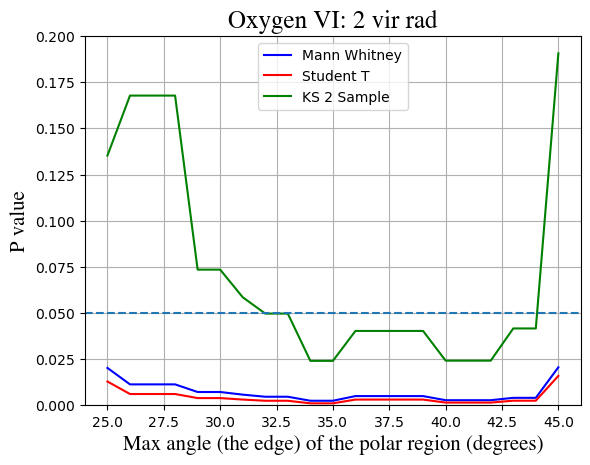

In [12]:
options= ['MannW_2r','StudT_2r','KS2_2r']
plt.plot(o6_p_data['max_polar'], o6_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[1]], label='Student T', color='red')
plt.plot(o6_p_data['max_polar'], o6_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Oxygen VI: 2 vir rad', font='Times', size=18)
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.axhline(y=0.05, linestyle= '--')
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [13]:
print(r" The average P value for Mann Whitney is {}.".format(o6_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(o6_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(o6_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 0.007023264841029833.
 The average P value for Student T is 0.004232629125463176
 The average P value for KS 2 Sample is 0.07146524271787062


# H I Compative Analysis 

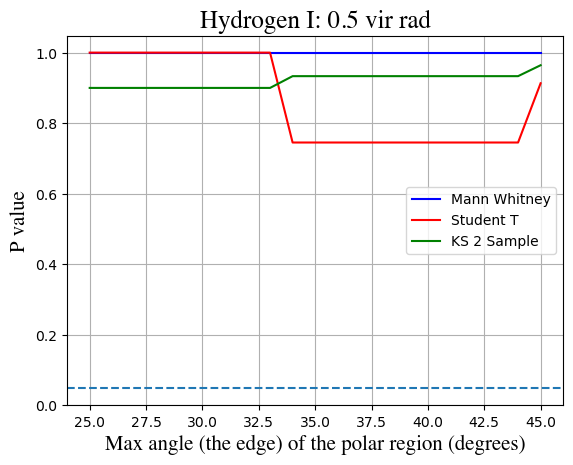

In [14]:
options= ['MannW_05r','StudT_05r','KS2_05r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 0.5 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [15]:
print(r" The average P value for Mann Whitney is {}.".format(h1_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(h1_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(h1_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 1.0.
 The average P value for Student T is 0.8624375857593061
 The average P value for KS 2 Sample is 0.9205215419501133


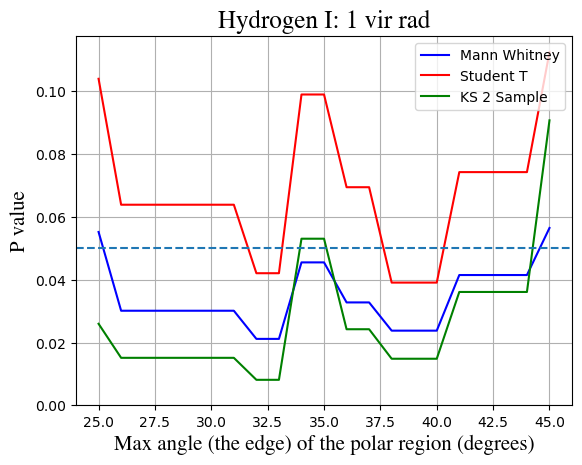

In [16]:
options= ['MannW_1r','StudT_1r','KS2_1r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 1 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [17]:
print(r" The average P value for Mann Whitney is {}.".format(h1_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(h1_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(h1_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 0.03469393148229517.
 The average P value for Student T is 0.06828641357127475
 The average P value for KS 2 Sample is 0.027018257922724935


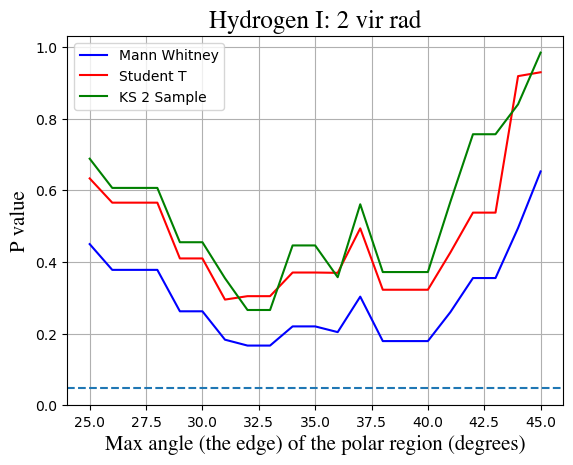

In [18]:
options= ['MannW_2r','StudT_2r','KS2_2r']
plt.plot(h1_p_data['max_polar'], h1_p_data[options[0]], label='Mann Whitney', color='blue')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[1]], label='Student T', color='red')
plt.plot(h1_p_data['max_polar'], h1_p_data[options[2]], label='KS 2 Sample', color='green')
plt.legend()
plt.grid()
plt.title('Hydrogen I: 2 vir rad', font='Times', size=18)
plt.axhline(y=0.05, linestyle= '--')
#plt.suptitle('min P value occurs at pole>35 and disk<35',font='Times', size=15)
plt.ylabel('P value', font='Times', size=15)
plt.xlabel('Max angle (the edge) of the polar region (degrees)', font='Times', size=15)
plt.ylim(ymin=0);

In [19]:
print(r" The average P value for Mann Whitney is {}.".format(h1_p_data[options[0]].mean()))
print(r" The average P value for Student T is {}".format(h1_p_data[options[1]].mean()))
print(r" The average P value for KS 2 Sample is {}".format(h1_p_data[options[2]].mean()))

 The average P value for Mann Whitney is 0.2967907206772267.
 The average P value for Student T is 0.4750634188321622
 The average P value for KS 2 Sample is 0.5302989587416748
